In [2]:
import pandas as pd
df = pd.read_parquet("../data/processed/date=2025-08-27/part-0000.parquet") # ../ : 상위 디렉토리(프로젝트 루트)로 올라가서 찾도록 함
df.head()

,date,city,temp_c,precip_mm,humidity
0,2025-08-27,Tokyo,30.49,0.0,72.0
1,2025-08-27,JP,30.49,0.0,72.0
2,2025-08-27,Osaka,29.11,0.0,64.0
3,2025-08-27,JP,30.49,0.0,72.0
4,2025-08-27,Sapporo,20.15,0.0,88.0


In [3]:
df.describe()

,date,temp_c,precip_mm,humidity
count,6,6.000000,6.0,6.000000
mean,2025-08-27 00:00:00,28.536667,0.0,73.333333
min,2025-08-27 00:00:00,20.150000,0.0,64.000000
25%,2025-08-27 00:00:00,29.455000,0.0,72.000000
50%,2025-08-27 00:00:00,30.490000,0.0,72.000000
75%,2025-08-27 00:00:00,30.490000,0.0,72.000000
max,2025-08-27 00:00:00,30.490000,0.0,88.000000
std,NaN,4.145526,0.0,7.865537


In [4]:
df.groupby("date")["temp_c"].mean()

date
2025-08-27    28.536667
Name: temp_c, dtype: float64

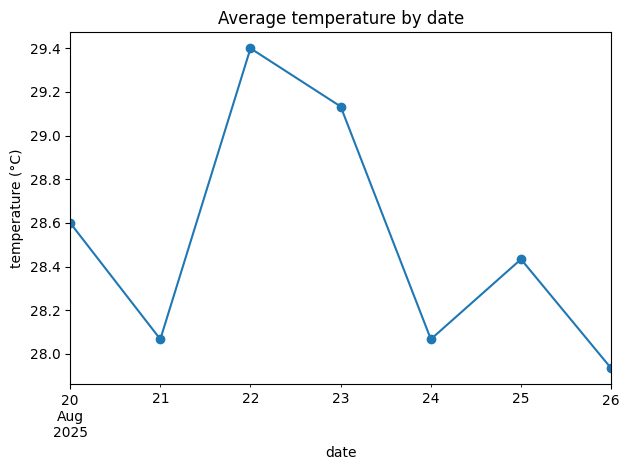

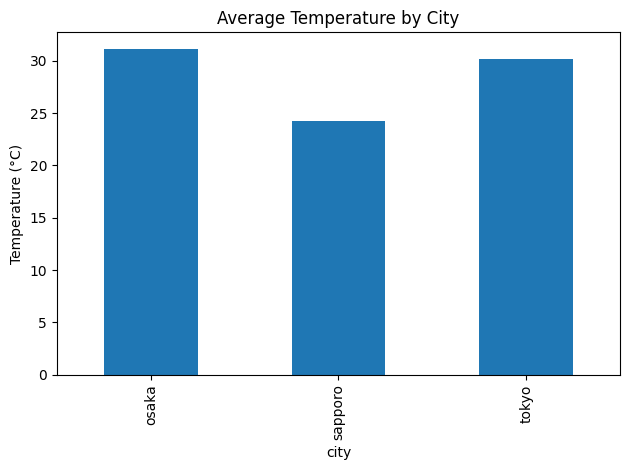

In [15]:
import matplotlib.pyplot as plt
from pathlib import Path

IMG_DIR = Path("..") / "docs" / "images"
IMG_DIR.mkdir(parents=True, exist_ok=True)

df = pd.read_parquet("../data/processed/date=2025-08-26/part-0000.parquet")

plt.figure()
df.groupby("date")["temp_c"].mean().plot(marker='o')
plt.title('Average temperature by date')
plt.xlabel("date"); plt.ylabel("temperature (°C)")
plt.tight_layout()
plt.savefig(IMG_DIR / "avg_temp_by_date.png")
plt.show()

plt.figure()
df.groupby("city")["temp_c"].mean().plot(kind="bar")
plt.title("Average Temperature by City")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.savefig(IMG_DIR / "avg_temp_by_city.png")
plt.show()